# TD1 : Echantillonnage et décomposition en série de Fourrier


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import torchaudio
import sox
import soundfile
import torch
from IPython.display import Audio, display
from scipy.fft import fft
from utils import *

1/ Spectre en amplitude : représentation du contenu fréquentiel en amplitudes

2/ Les voyelles "a" et "i" possèdent la même fréquence fondamentale mais pas les mêmes harmoniques.

In [6]:
sampling_rate = 8000
audio_length = 1.2
f0 = 195
audio_timestamps = np.array([0.1,0.5,0.5,0.1])
#truc = np.linspace()





In [7]:
def sinusoide(tps, f0):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # f0 : fréquence fondamentale, inverse de la période fondamentale
    return np.sin(2*np.pi*f0*tps)

In [17]:
def rectangle(tps, a, fs, m = None):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # a : largeur de la fenêtre (en secondes) où le rectangle vaut 1.
    # attention ici on placera par défaut le temps t=0 au milieu
    n = len(tps)
    if m:
        n1 = int(m*fs) - int(a*fs/2)
        n2 = int(m*fs) + int(a*fs/2)
    else:
        n1 = n//2 - int(a*fs/2)
        n2 = n//2 + int(a*fs/2)
    rec = np.zeros(n)
    rec[n1:n2] = 1
    return rec

In [12]:
def nextC(c):
    return c /4

In [16]:
c = 8.2

for i in range(5):
    c = nextC(c)
    print(c)

2.05
0.5125
0.128125
0.03203125
0.0080078125


In [23]:
silence = 19
t = np.linspace(0, audio_length, int(audio_length*sampling_rate))
audio = sinusoide(t,f0)
audio

array([ 0.00000000e+00,  1.52570394e-01,  3.01568385e-01, ...,
       -3.01568385e-01, -1.52570394e-01, -2.70476291e-13])

Text(0.5, 1.0, 'sinusoide')

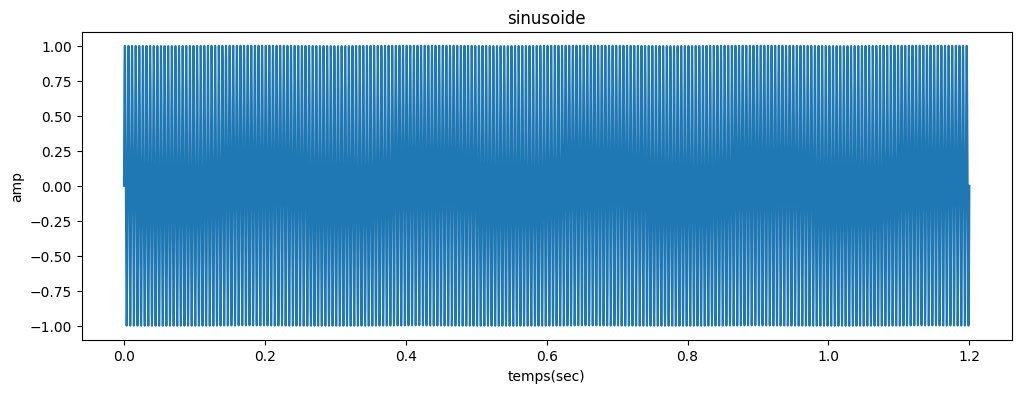

In [24]:
plt.figure(figsize=(12,4))
plt.plot(t,audio)
plt.xlabel('temps(sec)')
plt.ylabel('amp')
plt.title('sinusoide')

Type:        module
String form: <module 'torchaudio' from '/info/etu/m1/s2203093/.local/lib/python3.8/site-packages/torchaudio/__init__.py'>
File:        ~/.local/lib/python3.8/site-packages/torchaudio/__init__.py
Docstring:   <no docstring>